In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:

data = pd.read_csv('./dataset/train.csv')

Well look at some of the data

In [118]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [119]:
data.shape

(2000, 21)

seeing if there is any null in the data


In [120]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

What are the data types of the columns

In [121]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [122]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [123]:
data['blue']

0       0
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    1
Name: blue, Length: 2000, dtype: int64

In [124]:
data['blue'] = data['blue'].astype(object)

In [125]:
data.corr().style.background_gradient(cmap = "Blues")

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
clock_speed,0.011482,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399
pc,0.031441,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


In [126]:
columns = data.columns[data.any()].tolist()
a = []
b = []
for item in columns:
  a.append(data[item].min())
  b.append(data[item].max())
df = pd.DataFrame(columns, columns = ['Col'])
df['min']= a
df['max'] = b
df

,Col,min,max
0,battery_power,501.0,1998.0
1,blue,0.0,1.0
2,clock_speed,0.5,3.0
3,dual_sim,0.0,1.0
4,fc,0.0,19.0
5,four_g,0.0,1.0
6,int_memory,2.0,64.0
7,m_dep,0.1,1.0
8,mobile_wt,80.0,200.0
9,n_cores,1.0,8.0


In [127]:
# get columns whose min is 0 and max is 1
cols = data.columns[(data.min() == 0) & (data.max() == 1)]

# print the selected columns
print(cols)

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')


In [128]:
data[cols] = data[cols].astype('object')
print(data[cols].dtypes)

blue            object
dual_sim        object
four_g          object
three_g         object
touch_screen    object
wifi            object
dtype: object


categorical features



In [129]:
cat_features = [i for i in data.columns if data.dtypes[i]=='object']
cat_features

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

Numerical Features

In [157]:
num_features = [i for i in data.columns if data.dtypes[i] in ['int64', 'float']]
num_features[: -1]
num_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'price_range']

In [131]:
data.loc[:,'price_range'].value_counts()



1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

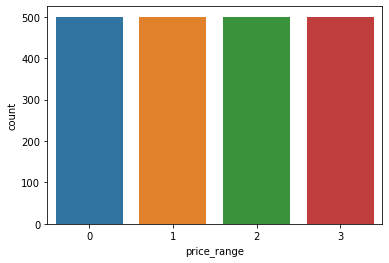

In [132]:
sns.countplot(x = 'price_range',data = data)


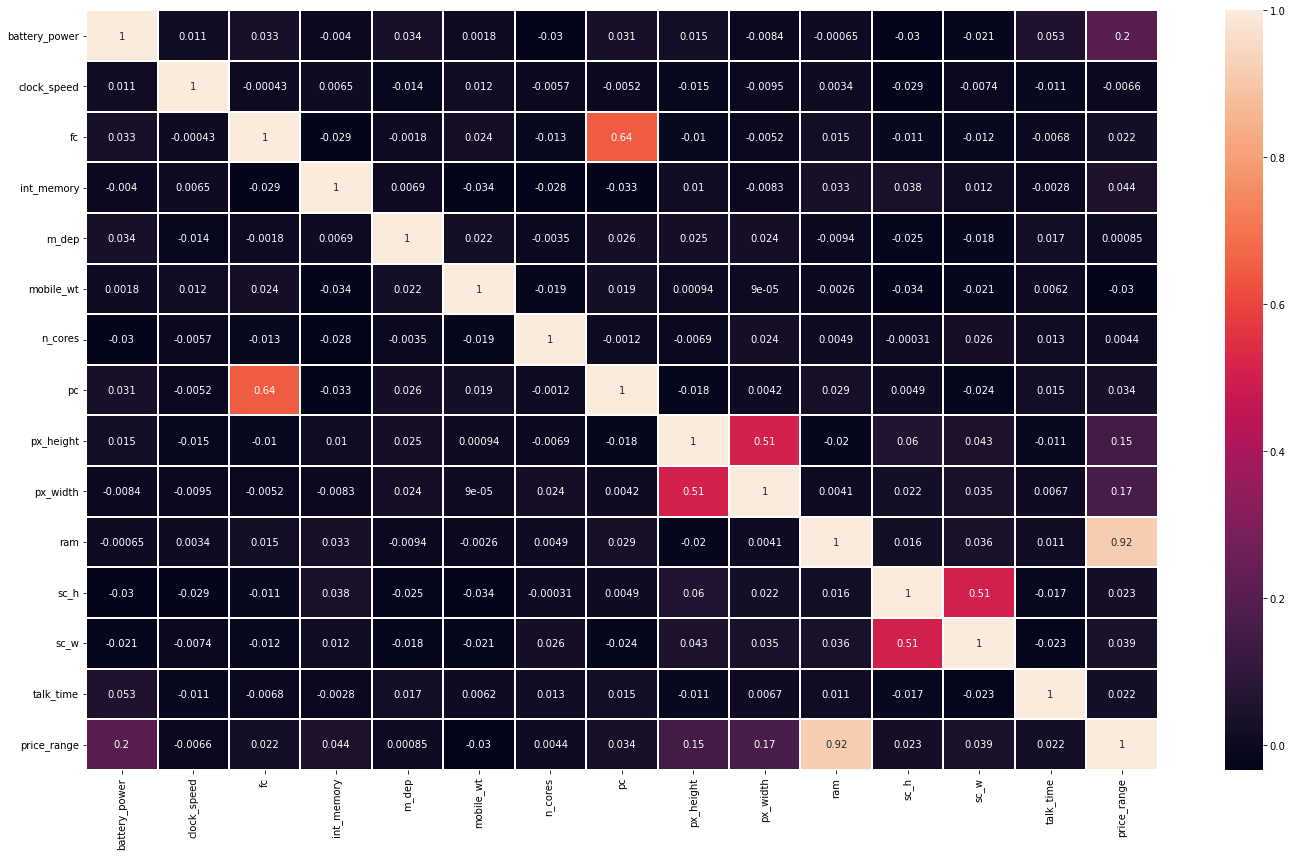

In [133]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot = True, linewidth = 2 )
plt.tight_layout()

<AxesSubplot:title={'center':'Correlation with target feature'}>

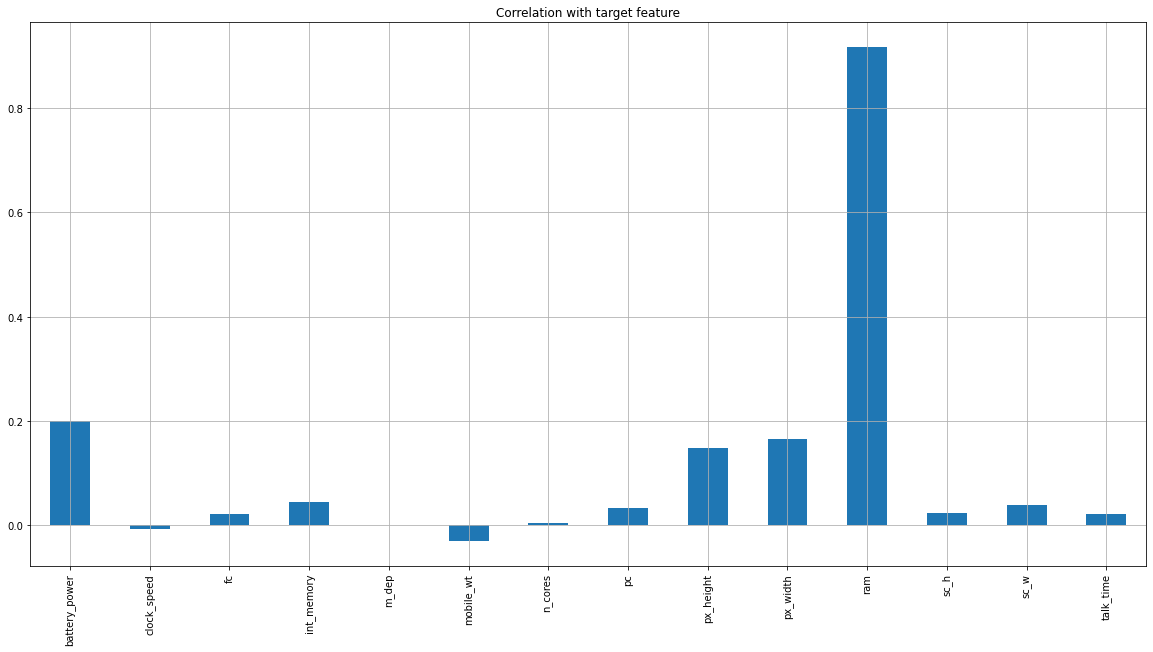

In [134]:
data.drop('price_range', axis=1).corrwith(data.price_range).plot(kind = 'bar', grid = True, figsize=(20,10), 
                                                                 title = 'Correlation with target feature')



# Exploring Numerical Features

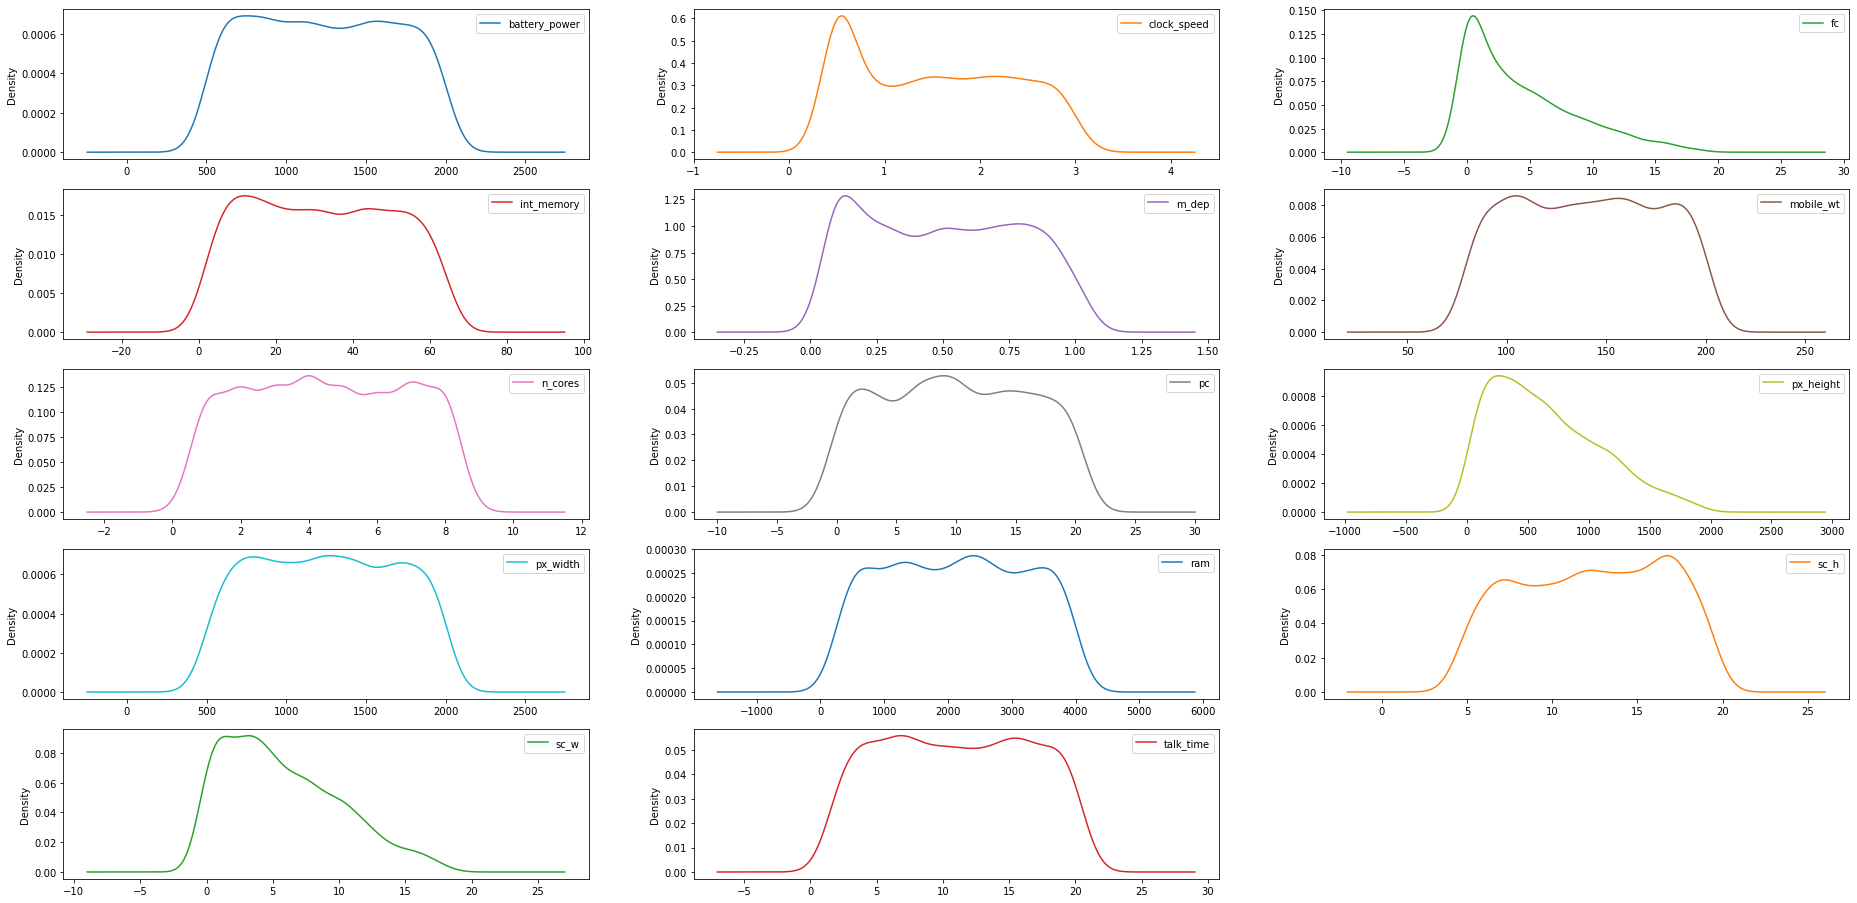

In [135]:
data[num_features].plot(kind='density', layout = (5,3),subplots=True,sharex=False,figsize=(32,16))


plt.show()


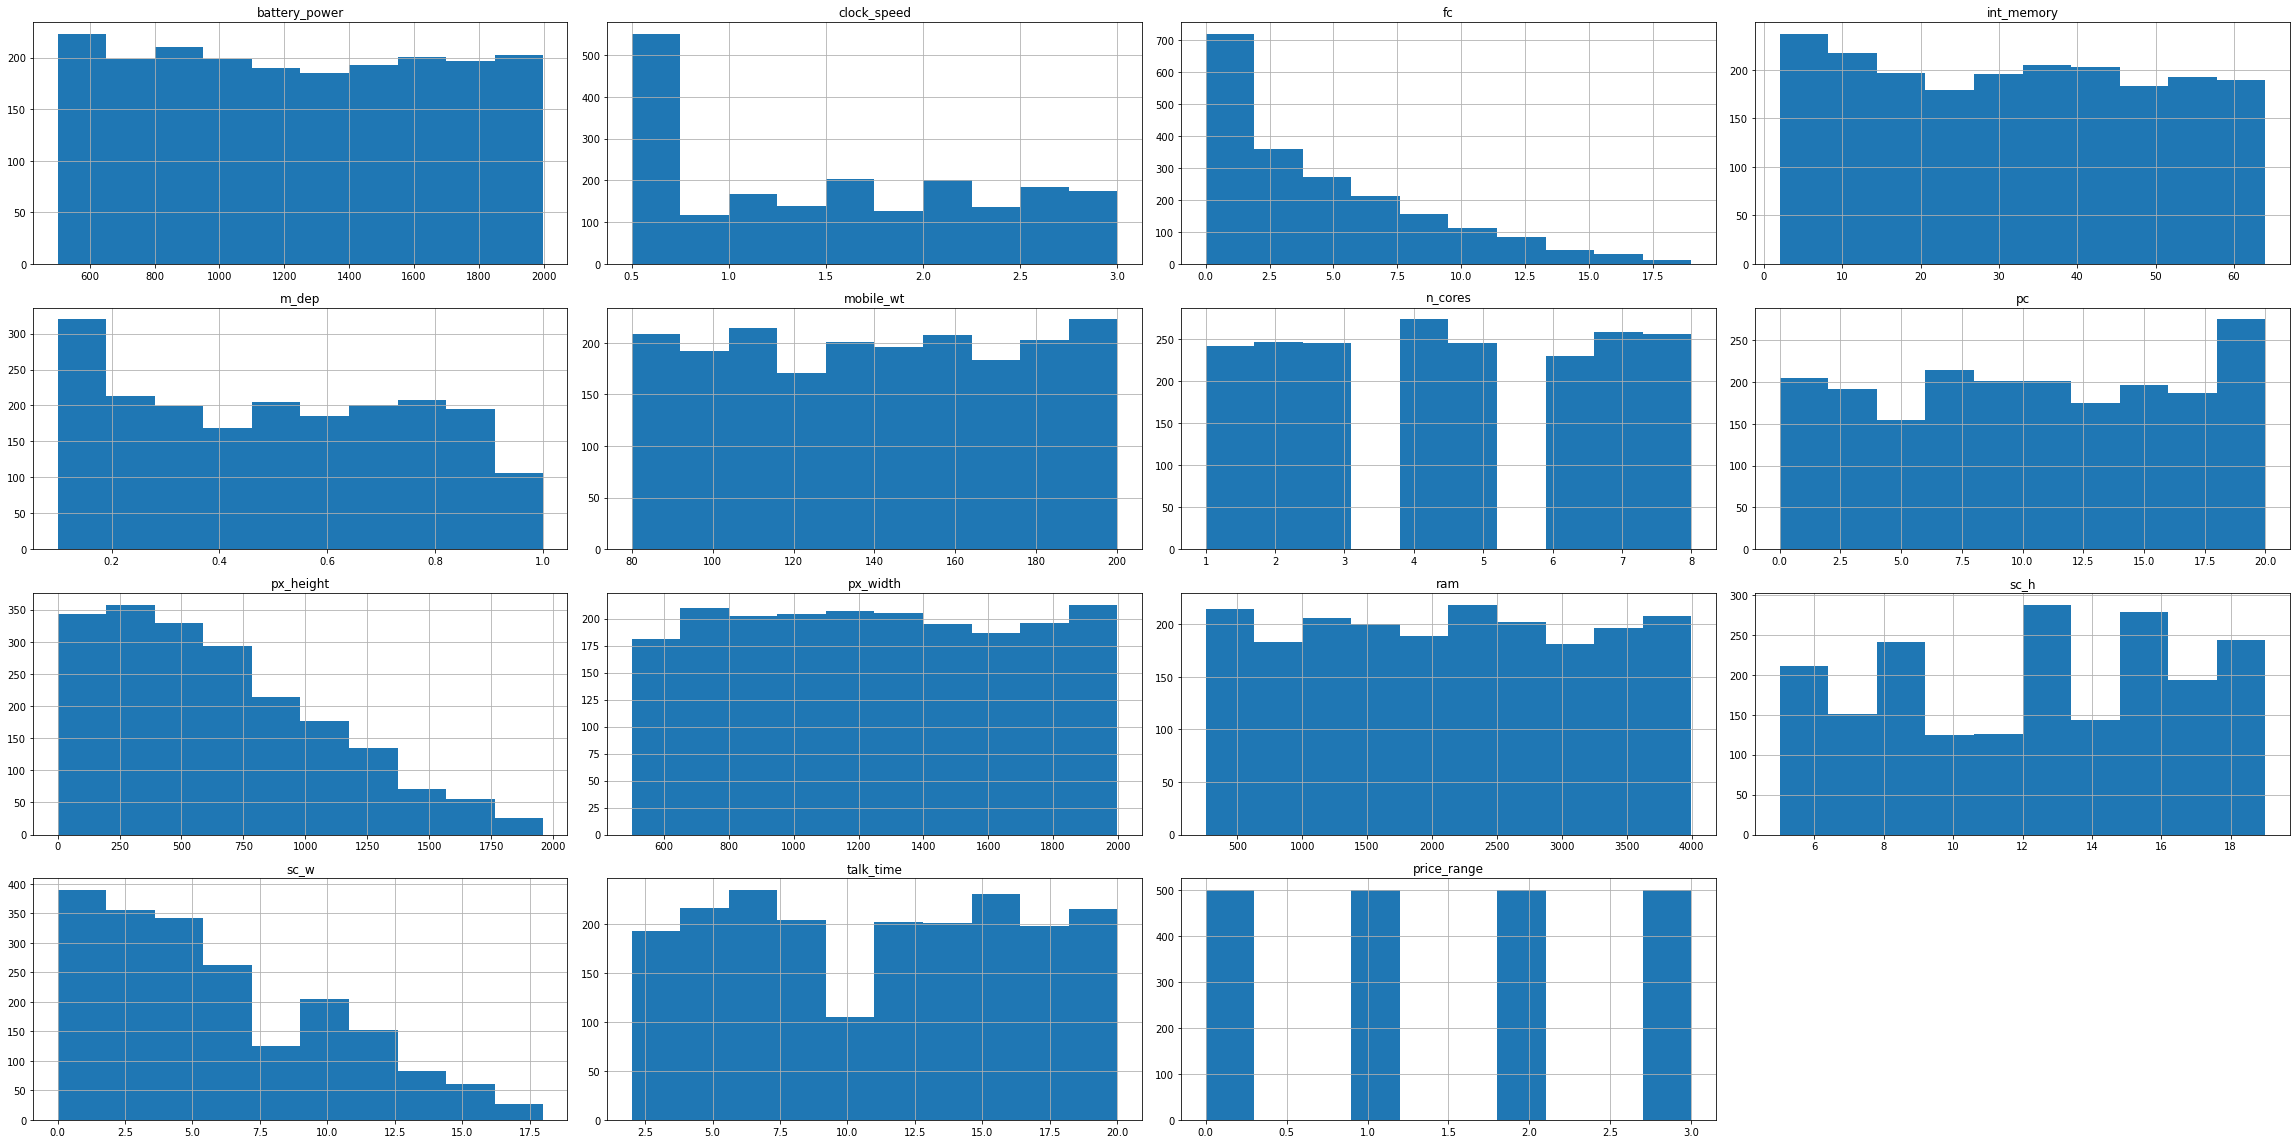

In [136]:
data.hist(figsize=(32,16))
plt.tight_layout()


c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


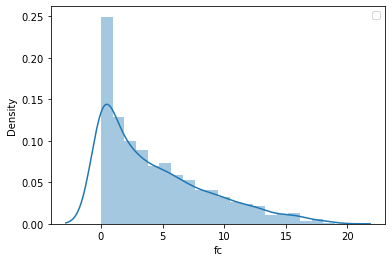

In [137]:
fig = plt.figure(2)
sns.distplot(data['fc'])
plt.legend()


In [138]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


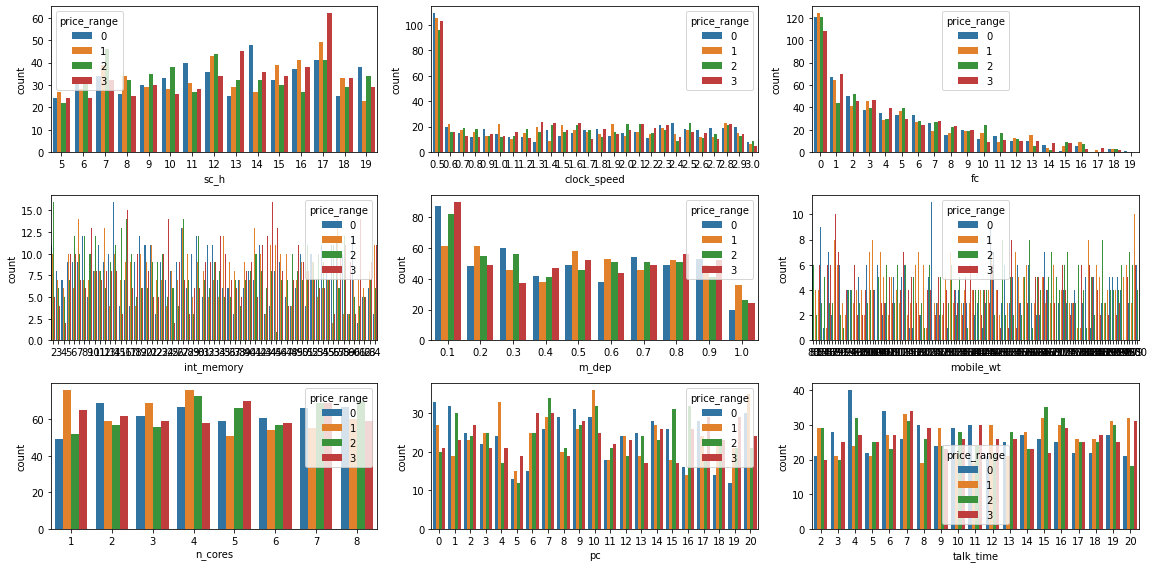

In [153]:
fig, ax = plt.subplots(3,3,figsize = (16,8))
sns.countplot(x=num_features[11],hue='price_range', data=data,ax = ax[0,0])
sns.countplot(x=num_features[1],hue='price_range', data=data,ax = ax[0,1])
sns.countplot(x=num_features[2],hue='price_range', data=data,ax = ax[0,2])
sns.countplot(x=num_features[3],hue='price_range', data=data,ax = ax[1,0])
sns.countplot(x=num_features[4],hue='price_range', data=data,ax = ax[1,1])
sns.countplot(x=num_features[5],hue='price_range', data=data,ax = ax[1,2])
sns.countplot(x=num_features[6],hue='price_range', data=data,ax = ax[2,0])
sns.countplot(x=num_features[7],hue='price_range', data=data,ax = ax[2,1])
sns.countplot(x=num_features[13],hue='price_range', data=data,ax = ax[2,2])

fig.tight_layout()


In [165]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (5,5))
    sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="red", label="Price Range", ax = ax)
    sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="#fccc79", label=column, ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()

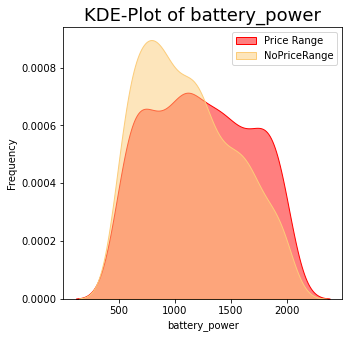

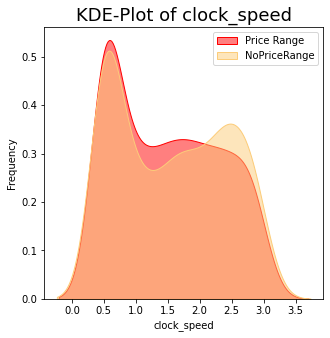

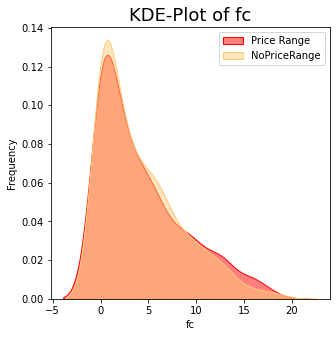

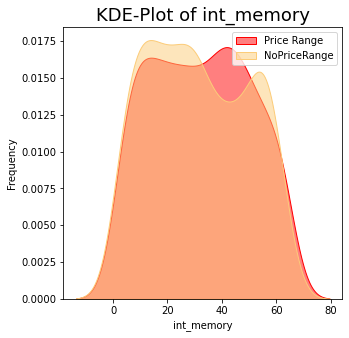

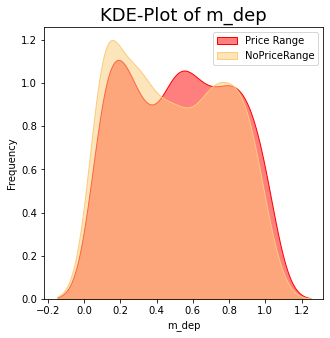

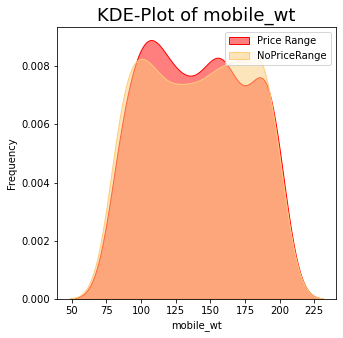

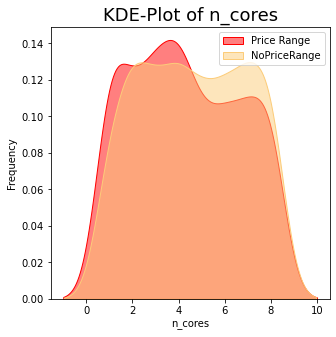

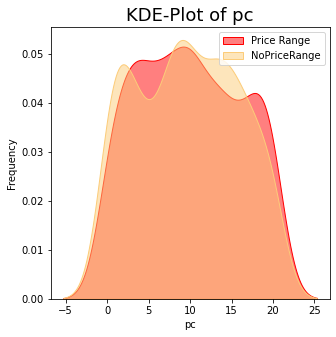

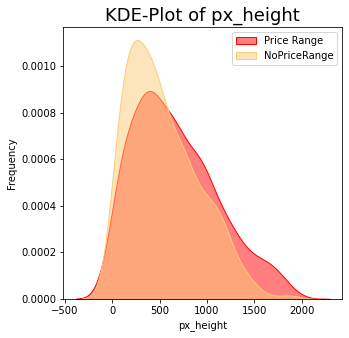

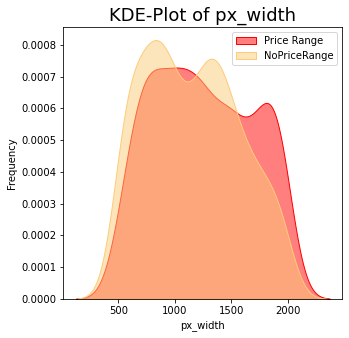

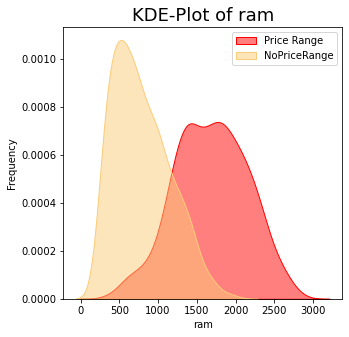

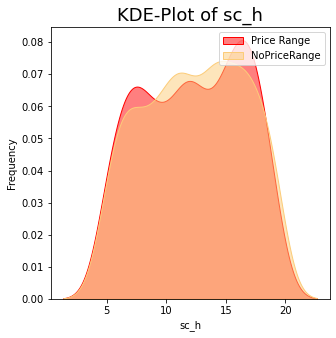

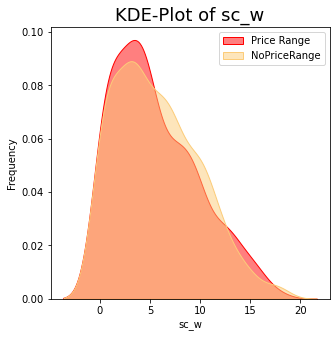

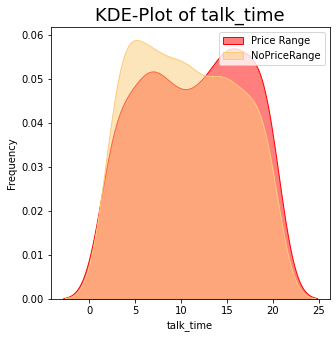

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


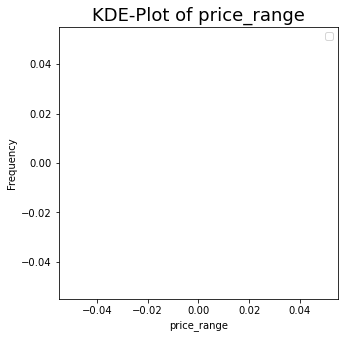

In [167]:
for column in num_features:
    kde_numerical_features(column, "price_range")